In [1]:
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/BTC_USD.csv.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-01-01,BTC,29333.605121,28935.810981,29601.594898,28753.412314
2021-01-02,BTC,32154.167363,29353.640608,33064.673534,29012.927887
2021-01-03,BTC,33002.536427,32074.106611,34452.080337,31885.581619
2021-01-04,BTC,31431.612280,32788.583453,33358.399346,28154.110298
2021-01-05,BTC,34433.606514,31991.926865,34435.417475,29948.653628


<AxesSubplot:xlabel='Date'>

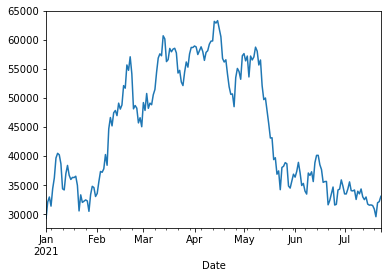

In [3]:
df["Closing Price (USD)"].plot()

<AxesSubplot:xlabel='Date'>

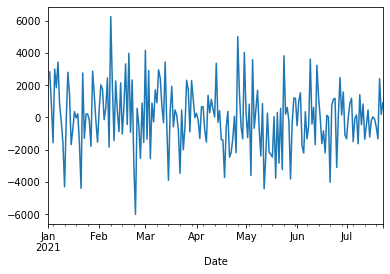

In [4]:
# Differencing the Settle price stationarizes the time series
df["Closing Price (USD)"].diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

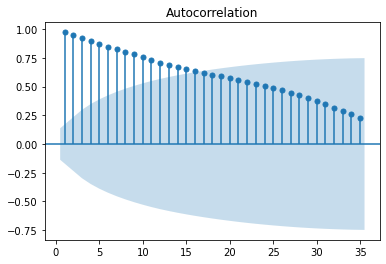

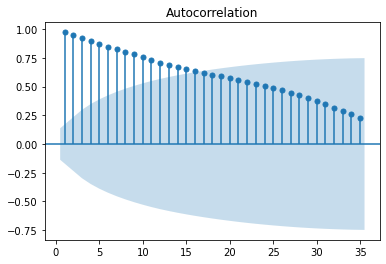

In [6]:
# Plot the autocorrelation of the Closing Prices
plot_acf(df["Closing Price (USD)"], zero=False, lags=35)

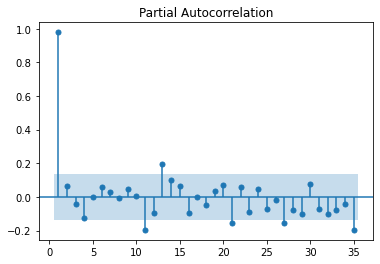

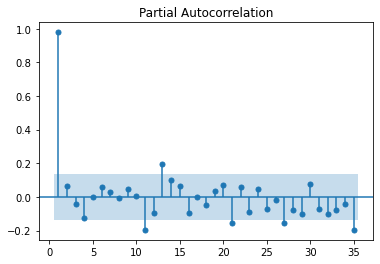

In [7]:
# Plot the partial autocorrelation of the returns
plot_pacf(df["Closing Price (USD)"], zero=False, lags=35)

# ARIMA Model

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
# Create an ARIMA model
model = ARIMA(df["Closing Price (USD)"].values, order=(3, 1, 1))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
# Fit the model to the data
results = model.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1823.383
Method:                       css-mle   S.D. of innovations           1925.968
Date:                Sat, 24 Jul 2021   AIC                           3658.765
Time:                        13:50:07   BIC                           3678.645
Sample:                             1   HQIC                          3666.808
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5310    150.135      0.150      0.881    -271.728     316.790
ar.L1.D.y      0.2879      0.668      0.431      0.666      -1.020       1.596
ar.L2.D.y      0.0746      0.079      0.938      0.348      -0.081       0.230
ar.L3.D.y      0.0459      0.088      0.522      0.602      -0.126       0.218
ma.L1.D.y     -0.3420      0.665     -0.514      0.607      -1.646       0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7723           -0.0000j            1.7723           -0.0000
AR.2           -1.6985           -3.0672j            3.5061           -0.3305
AR.3           -1.6985           +3.0672j            3.5061            0.3305
MA.1            2.9239           +0.0000j            2.9239            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

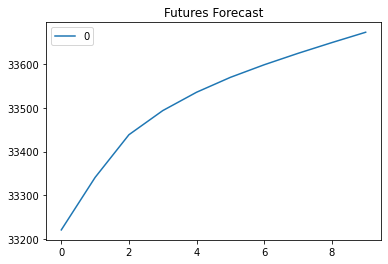

In [12]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

# ARIMA Model using a Lag of 2

In [13]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df["Closing Price (USD)"].values, order=(2, 1, 1))
results2 = model2.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mode

In [14]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1823.499
Method:                       css-mle   S.D. of innovations           1927.099
Date:                Sat, 24 Jul 2021   AIC                           3656.999
Time:                        13:50:07   BIC                           3673.565
Sample:                             1   HQIC                          3663.701
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1300    149.957      0.154      0.877    -270.780     317.039
ar.L1.D.y      0.5021      0.398      1.261      0.207      -0.278       1.283
ar.L2.D.y      0.0959      0.070      1.370      0.171      -0.041       0.233
ma.L1.D.y     -0.5538      0.395     -1.401      0.161      -1.329       0.221
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5390           +0.0000j            1.5390            0.0000
AR.2           -6.7725           +0.0000j            6.7725            0.5000
MA.1            1.8057           +0.0000j            1.8057            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

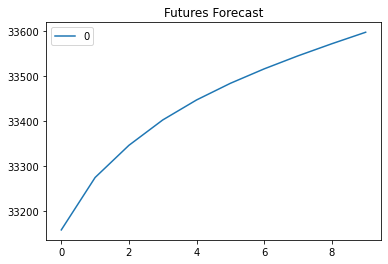

In [15]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")